# Worksheet 03&mdash;Ferromagnetic Hysteris
William Thompson &nbsp;&nbsp;&nbsp;&nbsp;
10091404&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
12wt9@queensu.ca

**Table of contents:**
0. Preamble
0. Data


## Preamble
Include matplotlib and numpy:

In [13]:
%pylab inline
import pandas as pd
import re
import sympy
from IPython.display import display, Markdown, Latex
import requests
import scipy.interpolate as interpolate
import scipy.stats as stats
from scipy.constants import physical_constants

Populating the interactive namespace from numpy and matplotlib


Define units to make code clearer, and auto-convert quantities to SI:

In [14]:
m = 1e0      # Meters
cm = m*1e-2  # Centimeters
V = 1e0      # Volts
mV = V*1e-3  # Milivolts

In [ ]:

n1=460         # change this in your experiment
delta = 333    # change this in your experiment
def plotdata(n1, delta):
    n2 = n1+delta
    n3 = n2+delta
    fig = plt.figure(1, figsize=(8,12))
    p1 = fig.add_subplot(311)
    p1.plot(t, B, 'r', t, H,'b')
    p1.plot(t[n1],H[n1],'ro')
    p1.plot(t[n2],H[n2],'ro')
    p1.plot(t[n3],H[n3],'ro')
    p1.set_xlabel('time (s)', fontsize = 16)
    p1.set_ylabel('B (V) and H (V)', fontsize = 16)
    plt.show()

def plotbhcurve():
    fig = plt.figure(1, figsize=(8,12))
    p2 = fig.add_subplot(312)
    p2.plot(H_bot, B_bot, 'r',H_top, B_top, 'b')
    p2.set_xlabel('H (V)', fontsize = 16)
    p2.set_ylabel('B (V)', fontsize = 16)
#     p2.set_ylim(-0.4+Bshift, 0.4+Bshift)
#     p2.set_xlim(-0.5+Hshift, 0.5+Hshift)
    plt.show()

Bshift=0.4
Hshift=0.5
t_top = t[n1:n2]
B_top = B[n1:n2]+Bshift
H_top = H[n1:n2]+Hshift
t_bot = t[n2:n3]
B_bot = B[n2:n3]+Bshift
H_bot = H[n2:n3]+Hshift

## Data

In [19]:
print([1,2,3] + [4,5,6])

[1, 2, 3, 4, 5, 6]


In [15]:
data = np.loadtxt('Iron.CSV', delimiter=',', skiprows=2)

X = data[:,0]
Y = data[:,1]


In [16]:
#uncertianty: 0.25V
# V,mV,mV
# readings = array(

# ]) * [V, mV, mV]  # Normalize units to Volts 

readings = pd.DataFrame(
    columns=['A', 'B', 'C'],
    data = array([V, mV, mV]) *[
        [54.0, 410.0,  337.5],
        [57.2, 500.0,  343.8],
        [61.8, 670.0,  356.3],
        [66.4, 820.0,  362.5],
        [68.0, 850.0,  362.5],
        [71.0, 960.0,  362.5],
        [75.0, 1080.0, 368.8],
        [80.0, 1200.0, 368.8],
        [85.0, 1250.0, 368.8],
        [50.0, 300.0,  309.4],
        [45.0, 220.0,  287.5],
        [40.0, 170.0,  265.6],
        [35.0, 130.0,  237.5],
        [30.0, 88.0,   206.3],
        [25.0, 64.0,   175.0],
        [20.0, 49.0,   143.8]]
)

# Read in CSV data
iron = pd.read_csv(
    r'./Iron.CSV',
    skiprows=[0,1],
)
iron.columns = ['Time', 'X1', 'X2']

steel = pd.read_csv(
    r'./Steel.CSV',
    skiprows=[0,1],
)
steel.columns = ['Time', 'X1', 'X2']

# Measurements of the iron bar
#Iron: L=34.6cm +/- 0.15, A=8.4  +/- 0.21cm
iron_length = 34.6*cm
iron_length_d = 0.15*cm
iron_area = 8.4*cm*cm
iron_area_d = 0.21*cm*cm

# Measurements of the steel bar
#Steel: L=10cm, A=7.1 +/- 0.19cm
steel_length = 10*cm
steel_length_d = 0.15*cm
steel_area = 7.1*cm*cm
steel_area_d = 0.218*cm*cm

### Readings

In [186]:
display(readings)

,A,B,C
0,54.0,0.410,0.3375
1,57.2,0.500,0.3438
2,61.8,0.670,0.3563
3,66.4,0.820,0.3625
4,68.0,0.850,0.3625
5,71.0,0.960,0.3625
6,75.0,1.080,0.3688
7,80.0,1.200,0.3688
8,85.0,1.250,0.3688
9,50.0,0.300,0.3094


Summary of iron data:

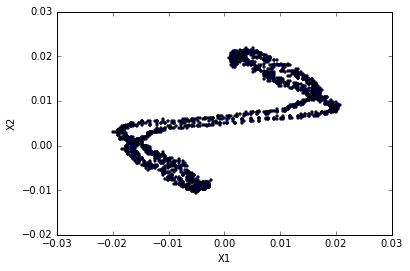

In [18]:
iron.plot.scatter('X1', 'X2', marker='.');

Summary of steel data:

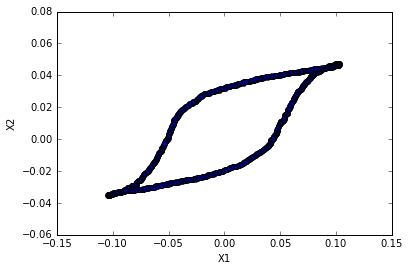

In [17]:
steel.plot.scatter('X1', 'X2');

In [ ]:
steel.hist('X1', 'X2')